## 4.a Plot type - xy


Our first plot example is a simple xy-plot and the graphics output format is PNG.


In [1]:
import Ngl

wks = Ngl.open_wks('png', 'plot_xy')

To use Numpy arrays we need to import the module. 
Define x- and y-values:

In [2]:
import numpy as np

x = np.arange(0,5)
y = np.arange(0,10,2)

In [3]:
plot = Ngl.xy(wks, x, y)

Hm, we created the plot but where is it? Unlike matplotlib PyNGL can't display inline plots but IPython provides a solution for us.

retina=True --> half of the size of the plot


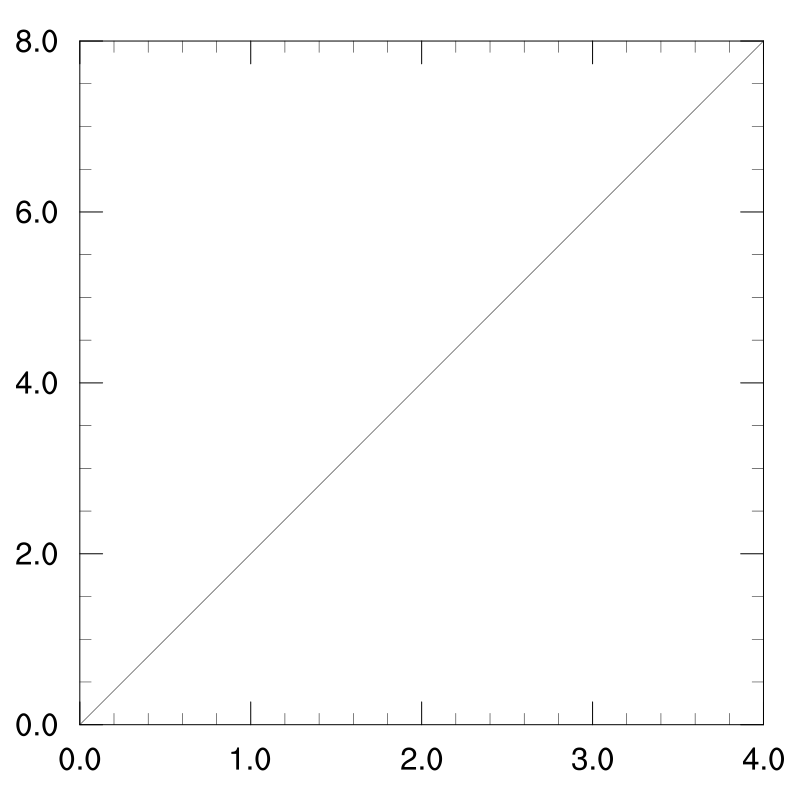

In [4]:
from IPython.display import Image
Image(filename='plot_xy.png', retina=True) 

That's really sparse. Next, we want to add a title above the plot and add the axis titles, too.

To do that we use the plot resources and add the resources to the plot function.

**NOTICE**: 

The first plot call has created a file called **plot_map1.png**. If we call plot again it will create two files with the names **plot_maps1.000001.png**, **plot_maps1.000001.png**, and so on. The first one is the plot above, the second will be the one the plot below. If we make changes it will increase the number of plots on disk, and it is hard to display the correct plot in the notebook. That's why we delete the workstation and create just one single plot.

If you use a script and run it at a terminal the workstation will be closed when the script exits, and you can rerun it without producing multiple files.
<br>

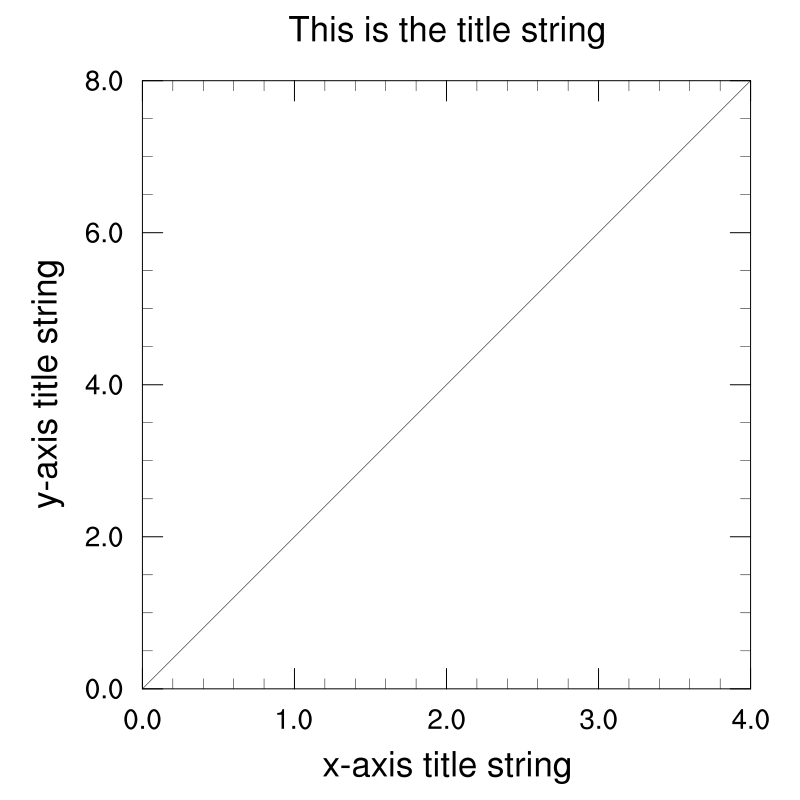

In [5]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'
res.tiXAxisString  = 'x-axis title string'
res.tiYAxisString  = 'y-axis title string'

plot = Ngl.xy(wks, x, y, res)

Image(filename='plot_xy.png', retina=True) 

Display the grid lines of the coordinate system, too.

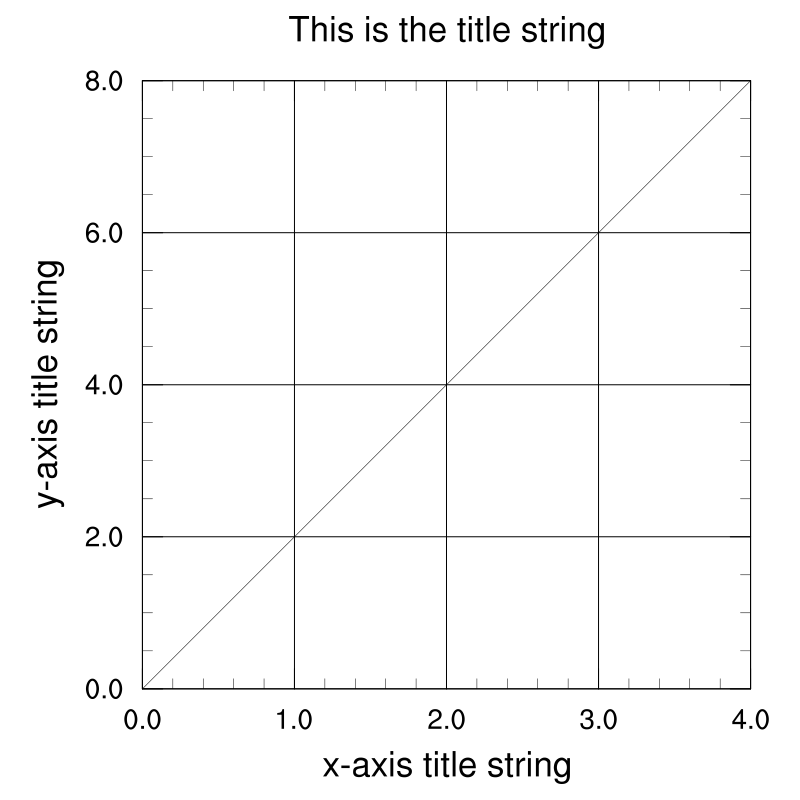

In [6]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'
res.tiXAxisString  = 'x-axis title string'
res.tiYAxisString  = 'y-axis title string'

res.tmXMajorGrid   = True
res.tmYMajorGrid   = True

plot = Ngl.xy(wks, x, y, res)

Image(filename='plot_xy.png', retina=True) 

Change the line settings

- line color from black to red
- line pattern from solid pattern to dashed pattern
- line width thicker


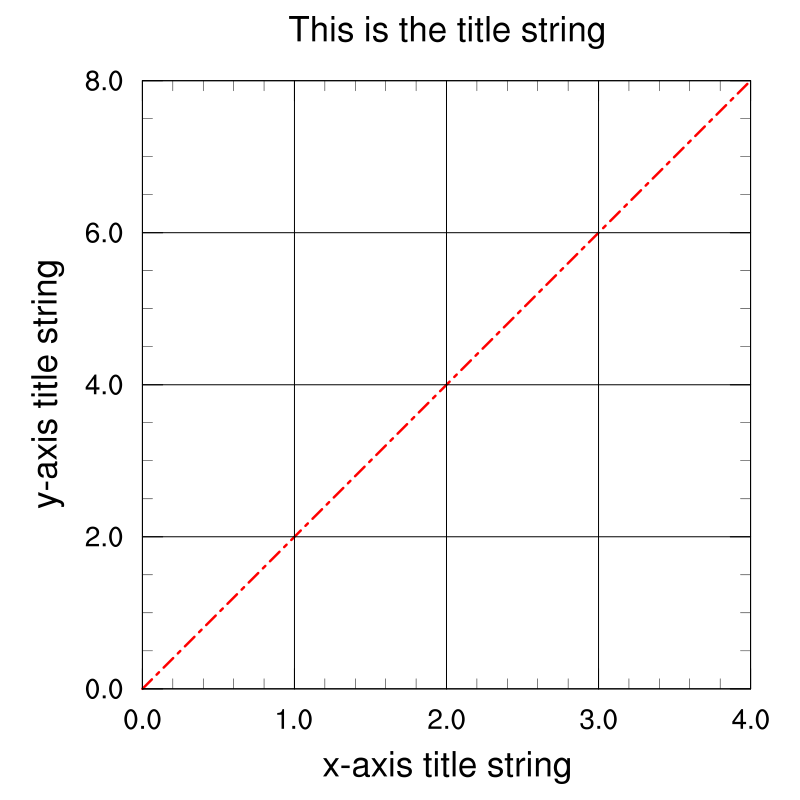

In [7]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'
res.tiXAxisString  = 'x-axis title string'
res.tiYAxisString  = 'y-axis title string'

res.tmXMajorGrid   = True
res.tmYMajorGrid   = True

res.xyLineColor    = 'red'
res.xyDashPattern  = 3       # -- - -- - --
res.xyLineThicknessF = 5

plot = Ngl.xy(wks, x, y, res)

Image(filename='plot_xy.png', retina=True) 

To display two datasets in one xy-plot.

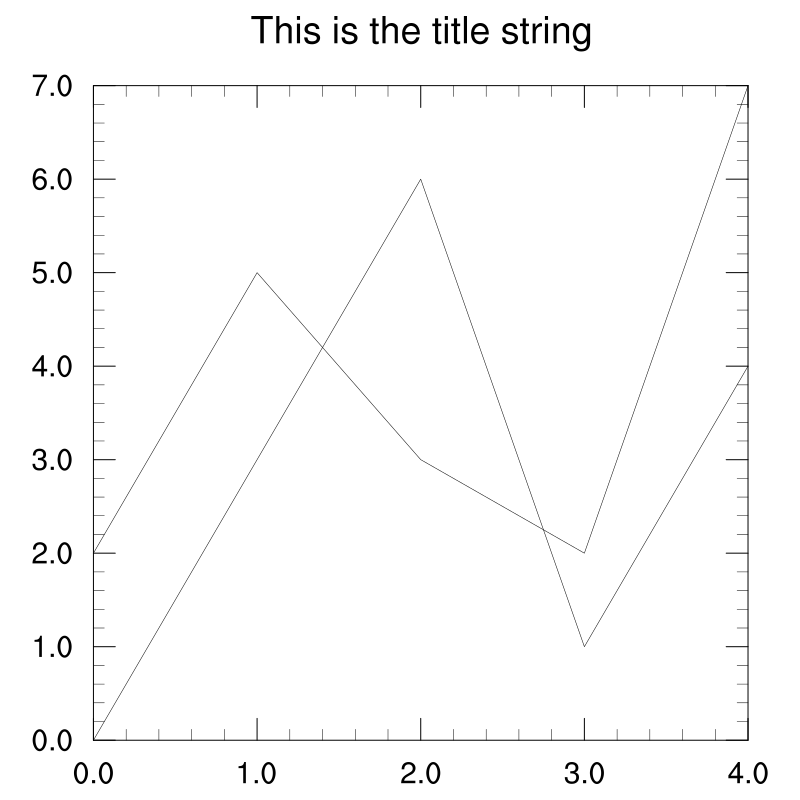

In [8]:
y1   = np.array([0,3,6,1,4])
y2   = np.array([2,5,3,2,7])
data = np.array([y1,y2])

Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'

plot = Ngl.xy(wks, x, data, res)

Image(filename='plot_xy.png', retina=True) 

Uh, that's not what we want! We want to have two lines with different colors, lets say red and blue. And while we're at it, they should have two different dash pattern types.

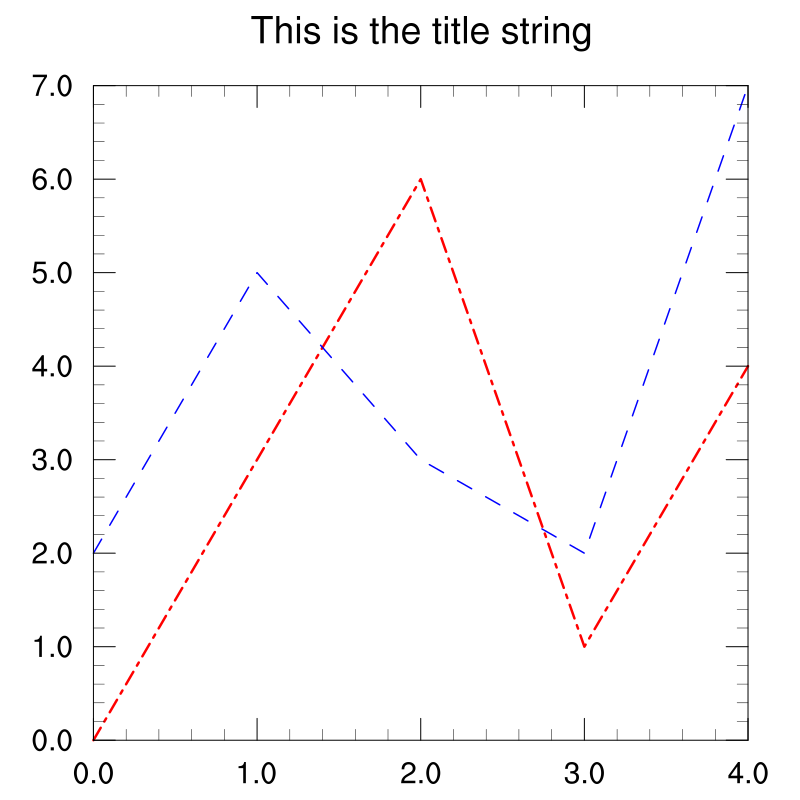

In [9]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'

res.xyLineColors   = ['red','blue']
res.xyDashPatterns = [3,16]
res.xyLineThicknesses = [5,3]

plot = Ngl.xy(wks, x, data, res)

Image(filename='plot_xy.png', retina=True) 

**NOTICE:**

The used resources for more than one color, line thickness and line dash pattern are the plural of the resources from the single line.

Set the same color, dash pattern and thickness for one or multiple lines:
```
res.xyLineColor
res.xyDashPattern
res.xyLineThicknessF
```
Set different colors, dash pattern and thickness for each line:
```
res.xyLineColors
res.xyDashPatterns
res.xyLineThicknesses
```


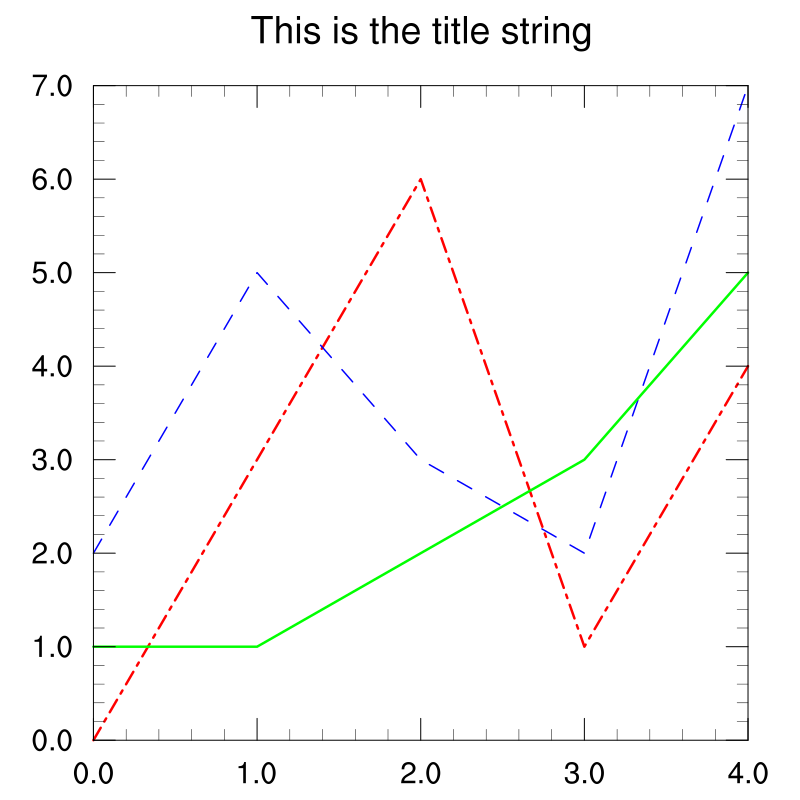

In [10]:
y1   = np.array([0,3,6,1,4])
y2   = np.array([2,5,3,2,7])
y3   = np.array([1,1,2,3,5])
data = np.array([y1,y2,y3])

Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'

res.xyLineColors   = ['red','blue','green']
res.xyDashPatterns = [3,16,0]
res.xyLineThicknesses = [5,3,5]

plot = Ngl.xy(wks, x, data, res)

Image(filename='plot_xy.png', retina=True)

We can distinguish them now but don't know which line is y1, y2 or y3. It is always good to have legend and that's what we want to do next.

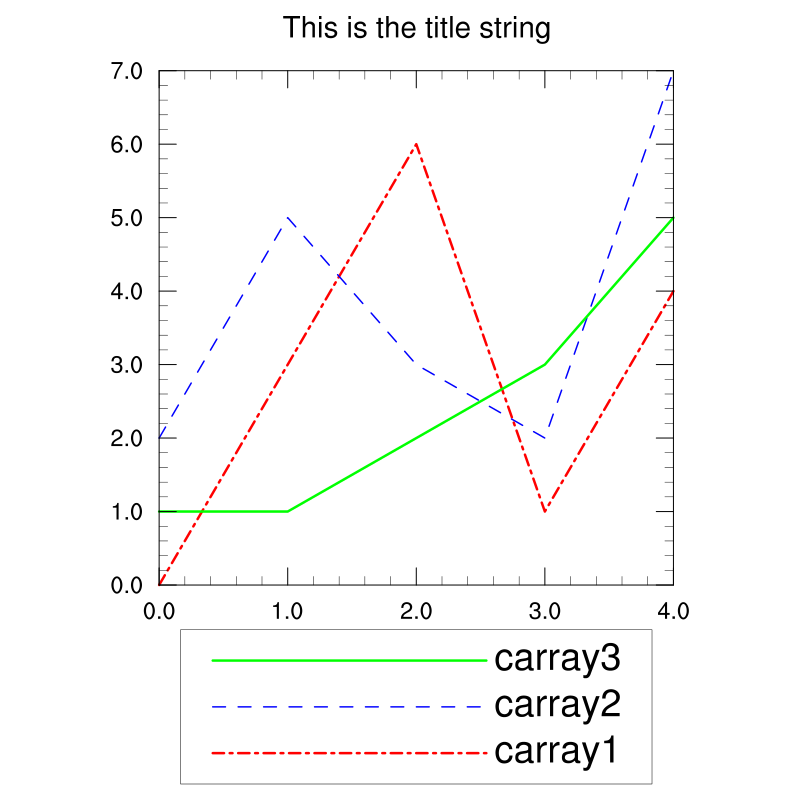

In [11]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'

res.xyLineColors   = ['red','blue','green']
res.xyDashPatterns = [3,16,0]
res.xyLineThicknesses = [5,3,5]

res.pmLegendDisplayMode = "Always"            #-- turn on the drawing

plot = Ngl.xy(wks, x, data, res)

Image(filename='plot_xy.png', retina=True)

That is the default. Doesn't look very nice, does it? So, we should fix it up a bit.

- use the correct dataset names
- make the legend smaller
- move it to the upper left inside the plot


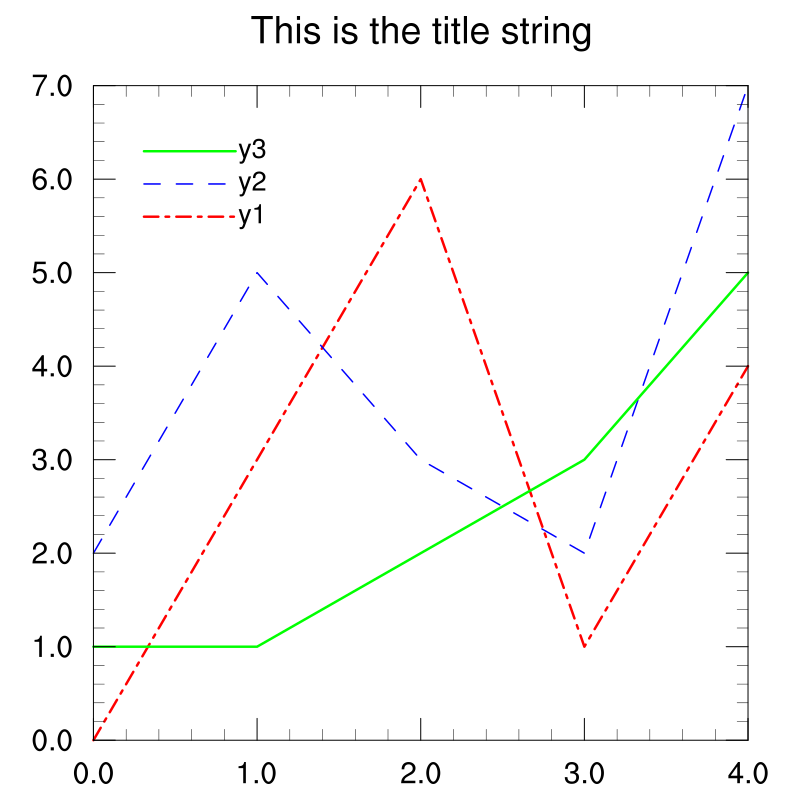

In [12]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy.png')

res = Ngl.Resources()
res.tiMainString   = 'This is the title string'

res.xyLineColors   = ['red','blue','green']
res.xyDashPatterns = [3,16,0]
res.xyLineThicknesses = [5,3,5]

res.xyExplicitLegendLabels = ["y1","y2","y3"]

res.pmLegendDisplayMode = "Always"            #-- turn on the legend drawing
res.pmLegendOrthogonalPosF = -1.0             #-- move the legend upward
res.pmLegendParallelPosF   =  0.17            #-- move the legend rightward
res.pmLegendWidthF   =  0.15                  #-- increase width
res.pmLegendHeightF  =  0.10                  #-- increase height
res.lgPerimOn        =  False                 #-- turn off the perimeter

plot = Ngl.xy(wks, x, data, res)

Image(filename='plot_xy.png', retina=True)

The next example shows how to read a dataset from file. 
```
Dataset:   ./data/tsurf_fldmean.nc
Variable:  tsurf
```

In [13]:
import xarray as xr

ds = xr.open_dataset('./data/tsurf_fldmean.nc')

tsurf = ds.tsurf

time = np.arange(0,len(ds.time),1)

The variable time is x and and the variable tsurf is y.

Note, that we have to use **tsurf.values** because Ngl.xy needs to get a **numpy array**.


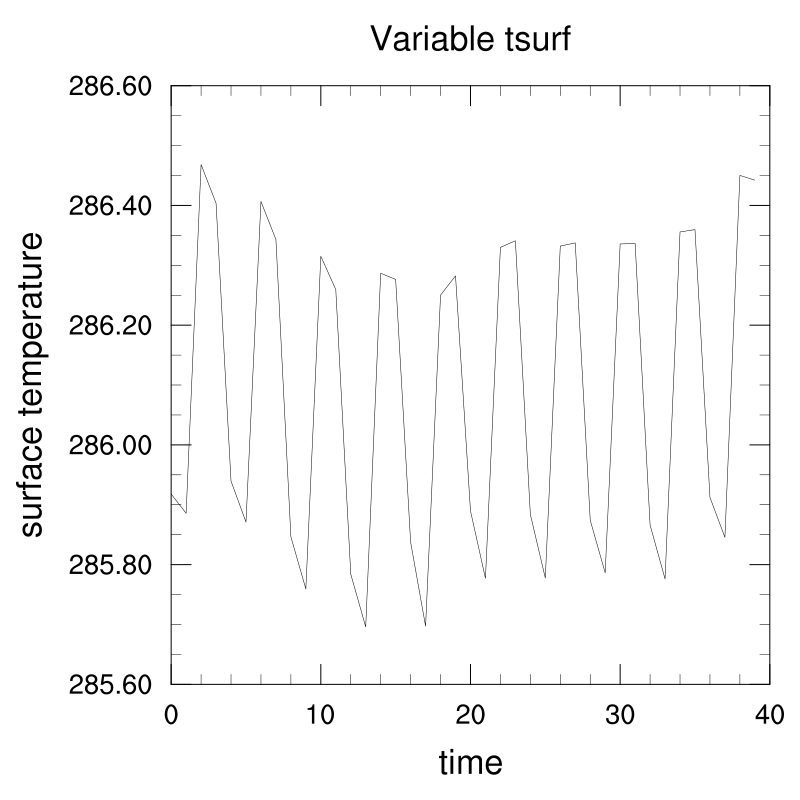

In [14]:
Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy_tsurf.png')

res = Ngl.Resources()
res.tiMainString   = 'Variable tsurf'
res.tiXAxisString  = 'time'
res.tiYAxisString  = tsurf.long_name

plot = Ngl.xy(wks, time, tsurf[:,0,0].values, res)

Image(filename='plot_xy_tsurf.png', retina=True) 

Hm, I would like to have the x-axis labels as dates and not as indices.

Convert the time values to date strings using the Python module datetime.


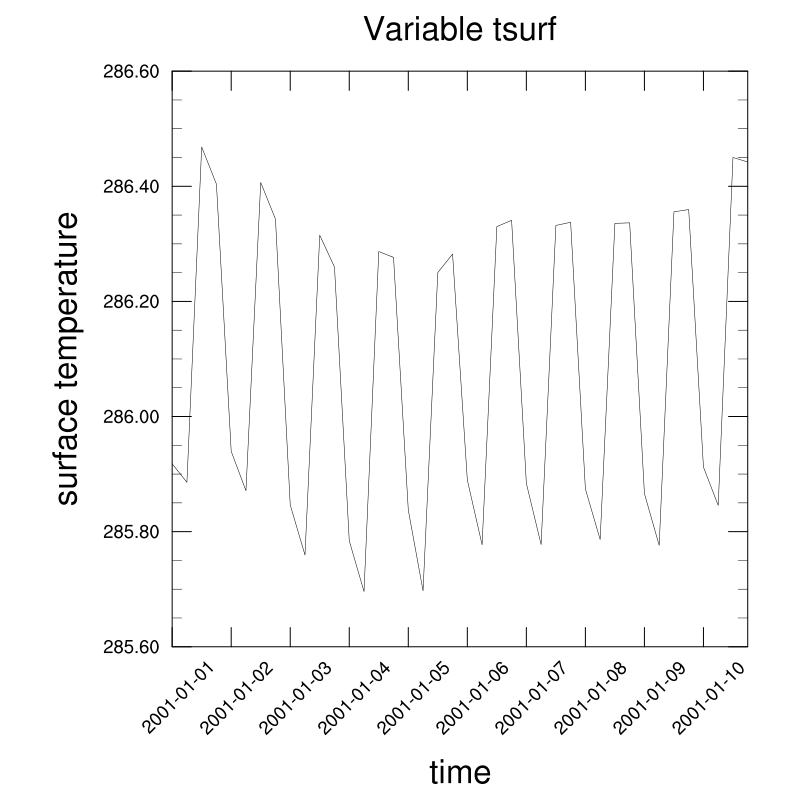

In [15]:
import datetime

ntime  = len(ds.time)
years  = ds.time.dt.year.values
months = ds.time.dt.month.values
days   = ds.time.dt.day.values

date_labels = [datetime.date(years[i],months[i],days[i]) for i in range(0,ntime)]
date_labels = list(np.array(date_labels,dtype='str'))

Ngl.delete_wks(wks)
wks = Ngl.open_wks('png', 'plot_xy_tsurf.png')

res = Ngl.Resources()
res.tiMainString    = 'Variable tsurf'
res.tiXAxisString   = 'time'
res.tiYAxisString   = tsurf.long_name

res.tmXBMode        = 'Explicit'              #-- use explicit values
res.tmXBValues      =  time[::4]              #-- use the new x-values array
res.tmXBLabels      =  date_labels[::4]       #-- use the new x-values array as labels
res.tmXBLabelFontHeightF = 0.008
res.tmXBLabelAngleF =  45
res.tmXBMinorOn     =  False                  #-- turn off minor tickmark

plot = Ngl.xy(wks, time, tsurf[:,0,0].values, res)

Image(filename='plot_xy_tsurf.png', retina=True) 